# Chapter 1

## Monte Carlo simulation for European Option

In [1]:
S0 = 100.0
K  = 105.0
T  = 1.0
r  = 0.05
sigma = 0.2

In [2]:
from numpy import *

In [3]:
I = 100000

draw I samples from normal distribution

In [4]:
z = random.standard_normal(I)

In [5]:
z

array([-0.5726564 , -0.65006794, -0.24653148, ...,  0.57064889,
       -0.59480466,  0.62130012])

In [6]:
ST = S0 * exp( (r - 0.5 * sigma ** 2)*T + sigma*sqrt(T)*z)

In [7]:
ST

array([  91.89429106,   90.48251237,   98.08788778, ...,  115.50339975,
         91.48813151,  116.67942414])

now we evaluate where the option is in the money

In [8]:
hT = maximum(ST-K,0)

and finally we make an average of this value with respecto to all samples I, we bring this average to present value using the continously compounded rate *r*

In [9]:
C0 = exp(-r * T) * sum(hT) / I
print("Value of the European Call option %5.3f" % C0)

Value of the European Call option 8.058


## Downloading data from Google

In [10]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb

In [11]:
goog = data.DataReader('GOOG', data_source='yahoo',start='3/14/2000', end='12/31/2017')
goog.tail()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-11  1035.500000  1043.800049  1032.050049  1041.099976  1041.099976   
2017-12-12  1039.630005  1050.310059  1033.689941  1040.479980  1040.479980   
2017-12-13  1046.119995  1046.665039  1038.380005  1040.609985  1040.609985   
2017-12-14  1045.000000  1058.500000  1043.109985  1049.150024  1049.150024   
2017-12-15  1054.609985  1067.619995  1049.500000  1064.189941  1064.189941   

             Volume  
Date                 
2017-12-11  1192800  
2017-12-12  1279500  
2017-12-13  1282700  
2017-12-14  1558700  
2017-12-15  3275931

In [12]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = pd.rolling_std(goog['Log_Ret'],window=252) * np.sqrt(252)

C:\Users\jegar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252,center=False).std()
  


In [13]:
goog['Log_Ret'] = np.log(goog['Close'] / goog['Close'].shift(1))
goog['Volatility'] = goog['Log_Ret'].rolling(window=252,center=False).std()* np.sqrt(252)

In [14]:
goog

Open         High          Low        Close    Adj Close  \
Date                                                                          
2004-08-19    49.676899    51.693783    47.669952    49.845802    49.845802   
2004-08-20    50.178635    54.187561    49.925285    53.805050    53.805050   
2004-08-23    55.017166    56.373344    54.172661    54.346527    54.346527   
2004-08-24    55.260582    55.439419    51.450363    52.096165    52.096165   
2004-08-25    52.140873    53.651051    51.604362    52.657513    52.657513   
2004-08-26    52.135906    53.626213    51.991844    53.606342    53.606342   
2004-08-27    53.700729    53.959049    52.503513    52.732029    52.732029   
2004-08-30    52.299839    52.404160    50.675404    50.675404    50.675404   
2004-08-31    50.819469    51.519913    50.749920    50.854240    50.854240   
2004-09-01    51.018177    51.152302    49.512966    49.801090    49.801090   
2004-09-02    49.274517    50.854240    49.150326    50.427021    50.427021   
2004-09-03    50.148830    50.541279    49.339096    49.681866    49.681866   
2004-09-07    50.178635    50.670437    49.483158    50.461796    50.461796   
2004-09-08    50.044510    51.182110    49.925285    50.819469    50.819469   
2004-09-09    50.933723    51.023144    50.173668    50.824436    50.824436   
2004-09-10    50.471729    52.935703    50.322701    52.324677    52.324677   
2004-09-13    52.970478    53.854729    52.886028    53.402668    53.402668   
2004-09-14    53.377831    55.638126    53.049961    55.384777    55.384777   
2004-09-15    54.922779    56.745922    54.743942    55.638126    55.638126   
2004-09-16    55.807030    57.525848    55.464260    56.616764    56.616764   
2004-09-17    56.840309    58.365391    56.408119    58.365391    58.365391   
2004-09-20    58.097134    60.407108    58.007717    59.294346    59.294346   
2004-09-21    59.517895    59.820923    58.375324    58.539257    58.539257   
2004-09-22    58.320679    59.448345    58.027588    58.807514    58.807514   
2004-09-23    59.036026    60.918781    58.131908    60.019630    60.019630   
2004-09-24    60.079243    61.649033    59.493053    59.527828    59.527828   
2004-09-27    59.393700    60.049435    58.519386    58.747902    58.747902   
2004-09-28    60.258080    63.288372    59.716602    63.020115    63.020115   
2004-09-29    62.940632    67.073753    62.707150    65.116478    65.116478   
2004-09-30    64.530296    65.722542    64.083199    64.381264    64.381264   
...                 ...          ...          ...          ...          ...   
2017-11-03  1022.109985  1032.650024  1020.309998  1032.479980  1032.479980   
2017-11-06  1028.989990  1034.869995  1025.000000  1025.900024  1025.900024   
2017-11-07  1027.270020  1033.969971  1025.130005  1033.329956  1033.329956   
2017-11-08  1030.520020  1043.521973  1028.449951  1039.849976  1039.849976   
2017-11-09  1033.989990  1033.989990  1019.666016  1031.260010  1031.260010   
2017-11-10  1026.459961  1030.760010  1025.280029  1028.069946  1028.069946   
2017-11-13  1023.419983  1031.579956  1022.570007  1025.750000  1025.750000   
2017-11-14  1022.590027  1026.810059  1014.150024  1026.000000  1026.000000   
2017-11-15  1019.210022  1024.089966  1015.419983  1020.909973  1020.909973   
2017-11-16  1022.520020  1035.920044  1022.520020  1032.500000  1032.500000   
2017-11-17  1034.010010  1034.420044  1017.750000  1019.090027  1019.090027   
2017-11-20  1020.260010  1022.609985  1017.500000  1018.380005  1018.380005   
2017-11-21  1023.309998  1035.109985  1022.655029  1034.489990  1034.489990   
2017-11-22  1035.000000  1039.706055  1031.430054  1035.959961  1035.959961   
2017-11-24  1035.869995  1043.177979  1035.000000  1040.609985  1040.609985   
2017-11-27  1040.000000  1055.459961  1038.439941  1054.209961  1054.209961   
2017-11-28  1055.089966  1062.375000  1040.000000  1047.410034  1047.410034   
2017-11-29  1042.680054  1044.079956  1015.650024  1021.659973  1021.

**%matplotlib inline**is a magic command

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002DF823E4588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000002DF8279F1D0>], dtype=object)

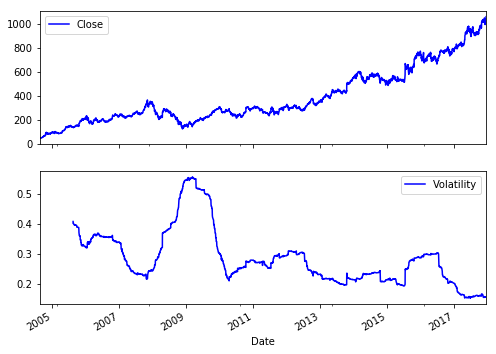

In [15]:
%matplotlib inline
goog[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

## Performance discussion
in here the author compares using loops as opposed to using numpy

In [16]:
loops = 25000000
from math import *
a = range(1, loops)
def f(x):
    return 3 * log(x) + cos(x) ** 2
%timeit r = [f(x) for x in a]

1 loop, best of 3: 17.1 s per loop


In [17]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

1 loop, best of 3: 930 ms per loop


In [18]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

1 loop, best of 3: 403 ms per loop


In [19]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

1 loop, best of 3: 187 ms per loop
